# Detección de datos atípicos iForest

Un dato atípico es un dato que se sale de la normalidad, generalmente se quieren evitar ya que genera sesgos en los modelos, pero en ocasiones se desean detectar, como lo es en una transferencia bancaria.

Un iForest está compuesto por varios iTrees

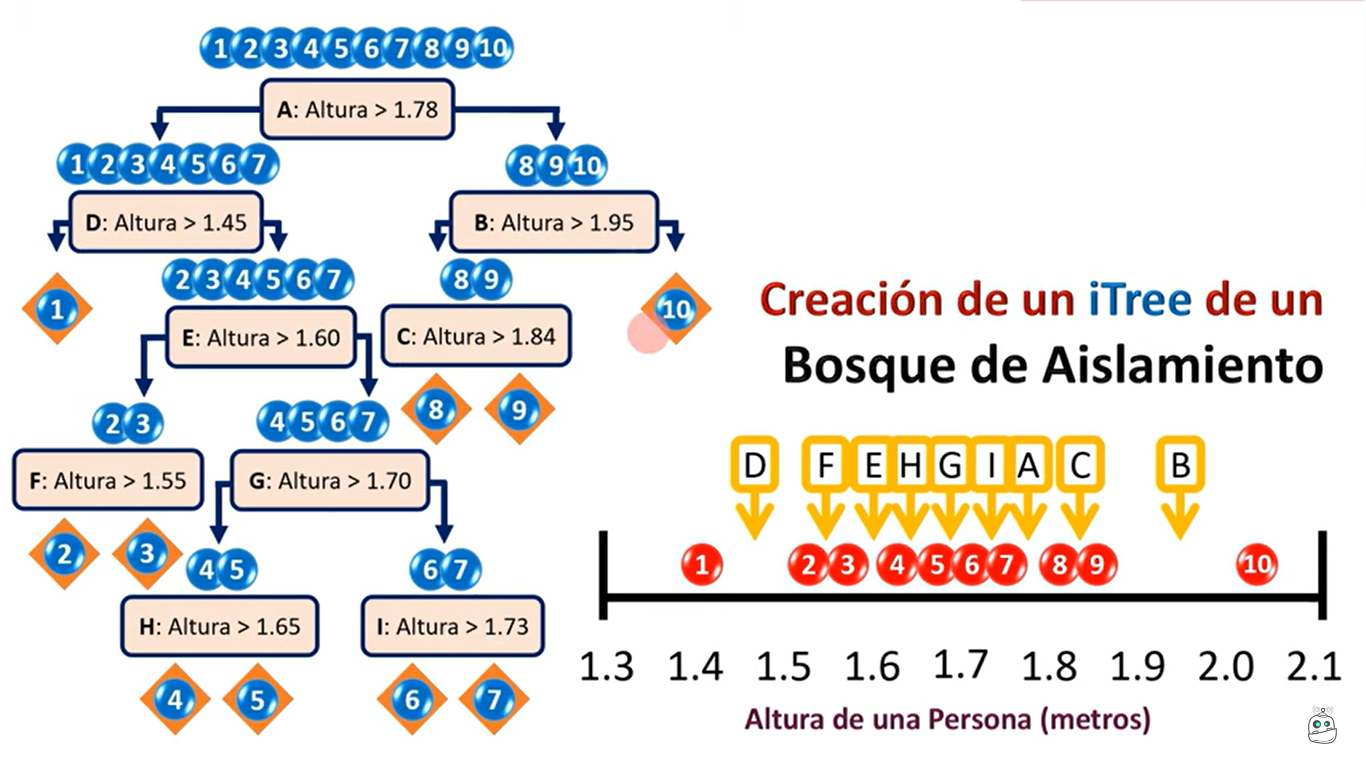

Los datos anómalos tienden a estar en las "ramas" más cortas, como no siempre es así, por ello se crea un ensable de iTrees, o sea un iForest.

## Implementación

In [9]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

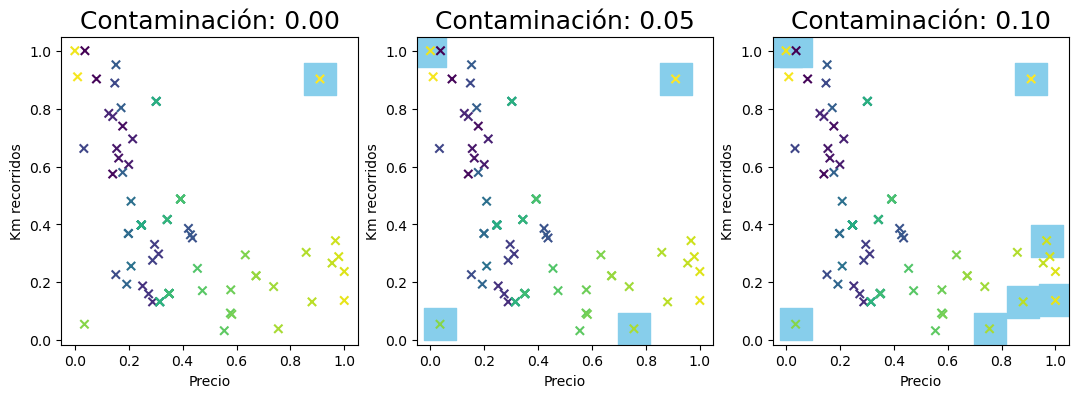

In [21]:
cars = np.loadtxt("../data/raw/carros_usados.csv", delimiter=",")
results = np.zeros((3, cars.size // 2))

c = [0.001, 0.05, 0.1]
fig = plt.figure(figsize=(13, 4))

for i in range(len(c)):
    model = IsolationForest(contamination=c[i]).fit(cars)
    results[i] = model.predict(cars)
    ax = fig.add_subplot(1, 3, i + 1)
    ax.scatter(cars[results[i] == -1][:, 0], cars[results[i] == -1][:, 1],
               c="skyblue", marker="s", s=500)
    ax.scatter(cars[:, 0], cars[:, 1],
               c=range(cars.size // 2), marker="x")
    ax.set_title("Contaminación: %0.2f" % c[i], size = 18)
    ax.set_xlabel("Precio")
    ax.set_ylabel("Km recorridos")